# Hands-on Exercise CLASS Module

In [ ]:

!pip install --user mlxtend

In [5]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions


In [6]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

In [82]:
values = [2,4,6,8,10,50]
labels = ['Max_Depth = 2','Max_Depth = 4','Max_Depth = 6','Max_Depth = 8','Max_Depth = 10','Max_Depth = 50']
for maxi,label in zip(values,labels):
    dt = DecisionTreeClassifier(max_depth = maxi )
    dt_scores = cross_val_score(dt, Data3_X, Data3_Y, cv=10, scoring='accuracy')
    print(label)
    print(dt_scores) 
    print('-----------------------')
        

Max_Depth = 2
[0.8   0.9   0.85  0.875 0.925 0.875 0.9   0.85  0.85  0.875]
-----------------------
Max_Depth = 4
[0.95  0.975 0.975 0.975 1.    1.    0.975 0.925 0.975 0.975]
-----------------------
Max_Depth = 6
[0.95  0.975 0.975 0.975 1.    1.    0.95  0.925 0.975 0.95 ]
-----------------------
Max_Depth = 8
[0.95  0.975 0.95  0.95  1.    0.975 0.9   0.925 0.975 0.95 ]
-----------------------
Max_Depth = 10
[0.925 0.95  0.95  0.95  1.    0.975 0.9   0.925 0.95  0.925]
-----------------------
Max_Depth = 50
[0.925 0.975 0.925 0.95  1.    0.975 0.9   0.9   0.95  0.925]
-----------------------


In [94]:
values = [2,4,6,8,10,50]
labels = ['Max_Depth = 2','Max_Depth = 4','Max_Depth = 6','Max_Depth = 8','Max_Depth = 10','Max_Depth = 50']
for maxi,label in zip(values,labels):
    dt = DecisionTreeClassifier(max_depth = maxi )
    dt_scores = cross_val_score(dt, Data3_X, Data3_Y, cv=10, scoring='accuracy')
    print(label)
    print('Accuracy=' +  str(dt_scores.mean()) )

Max_Depth = 2
Accuracy=0.8724999999999999
Max_Depth = 4
Accuracy=0.9724999999999999
Max_Depth = 6
Accuracy=0.97
Max_Depth = 8
Accuracy=0.9574999999999999
Max_Depth = 10
Accuracy=0.9450000000000001
Max_Depth = 50
Accuracy=0.9374999999999998


<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span>  The lowest accuracy is when Depth = 2 and the phenomenon is called Underfitting
and also as the max_depth increases after max_depth = 4 the accuracy is decreasing as the number of outliers increases and th

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span> When the max depth - 50 the accuracy tend to decrease slightly as the number of outliers increases as the depth increases from a threshold max_Depth. the phenomenon is called Over fitting.

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

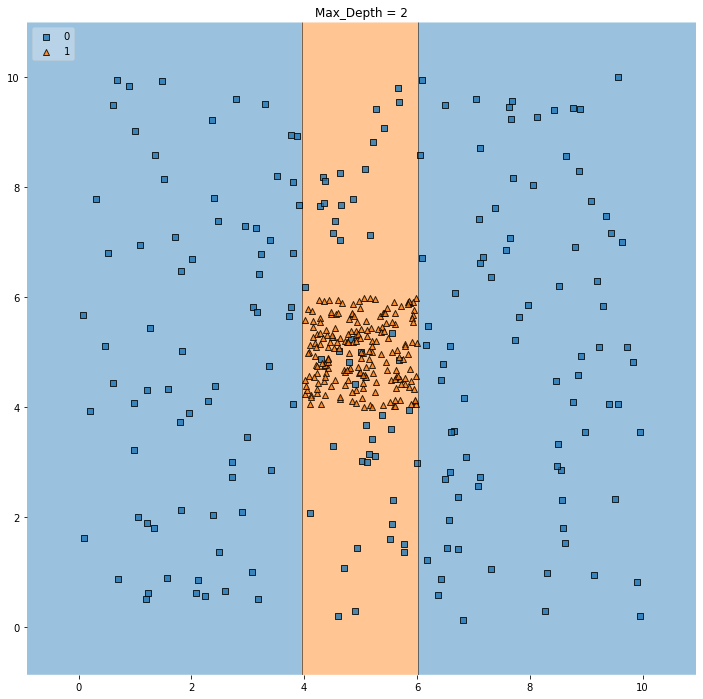

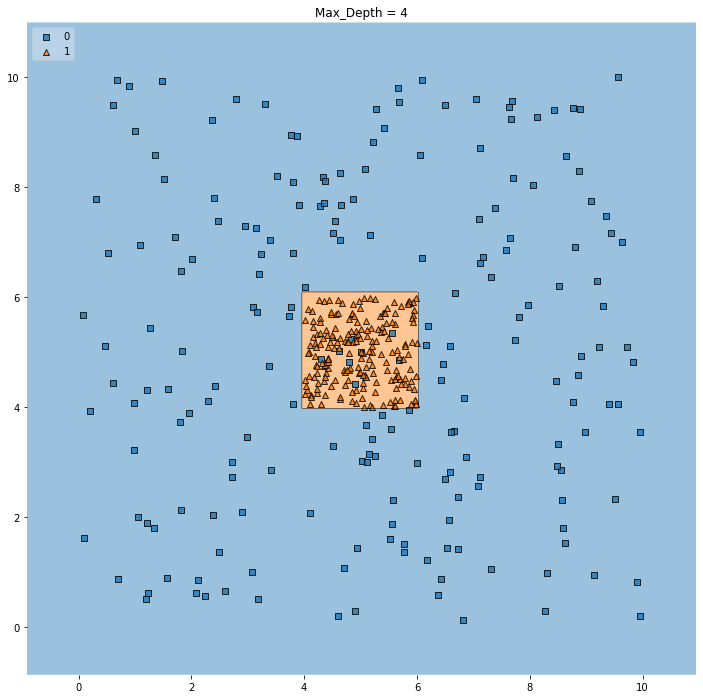

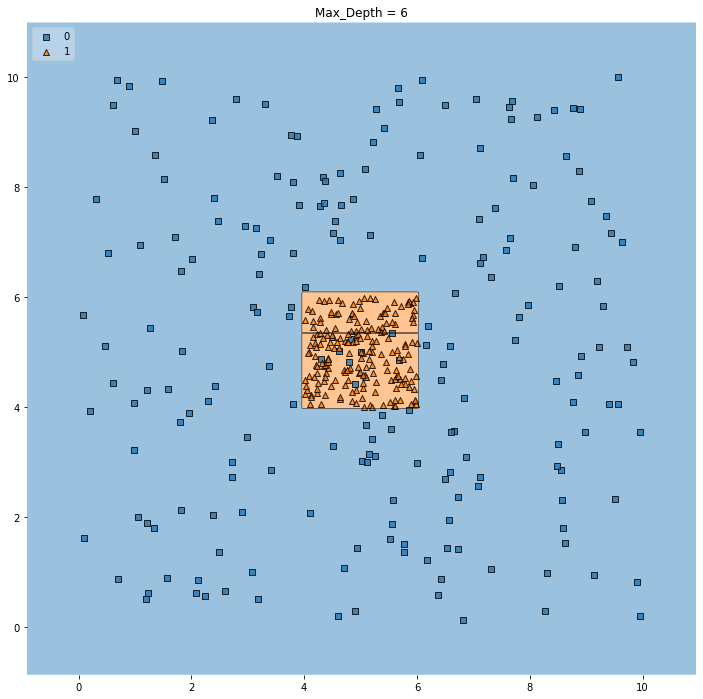

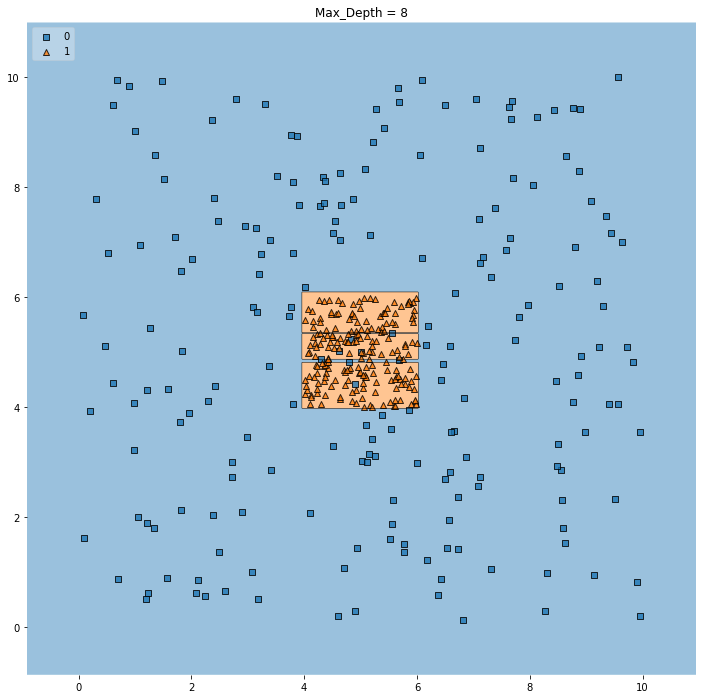

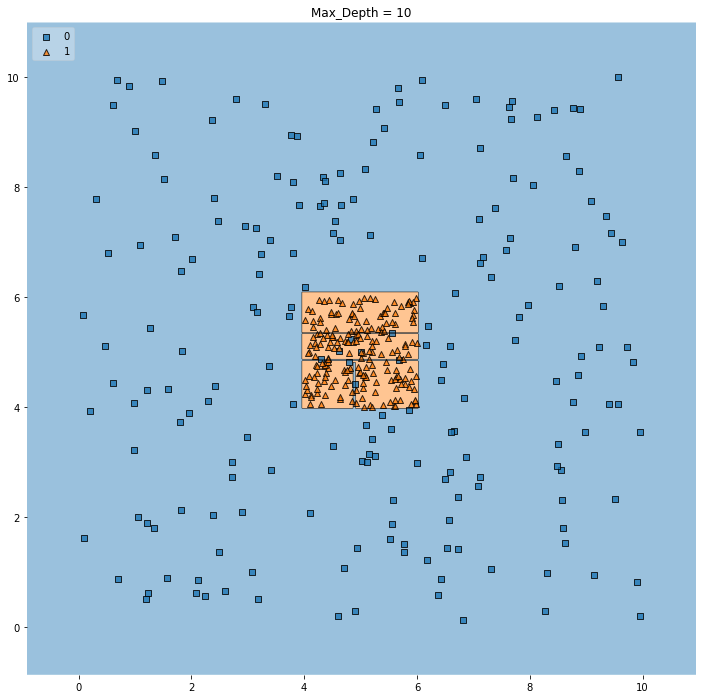

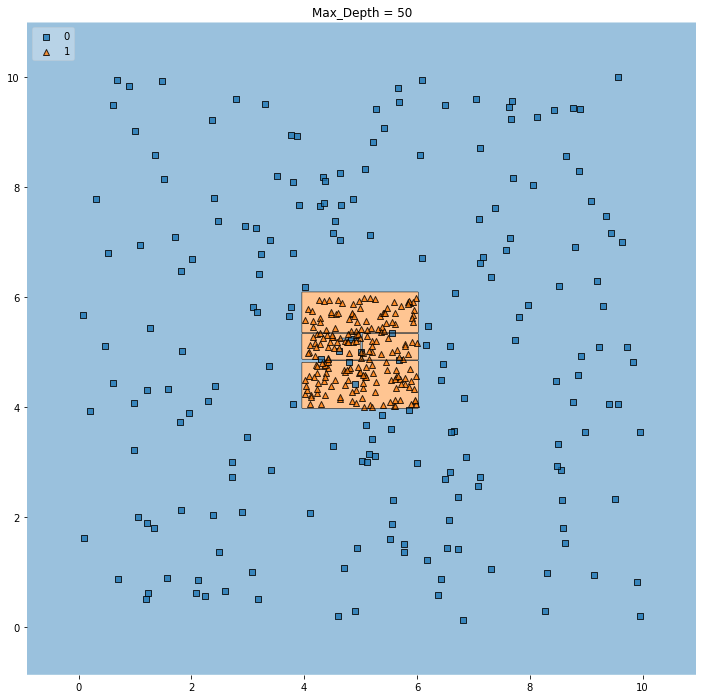

In [16]:
values = [2,4,6,8,10,50]
labels = ['Max_Depth = 2','Max_Depth = 4','Max_Depth = 6','Max_Depth = 8','Max_Depth = 10','Max_Depth = 50']

for maxi,label in zip(values,labels):
    fig = plt.figure(figsize= (12,12))
    dt = DecisionTreeClassifier(max_depth = maxi )
    dt.fit(Data3_X, Data3_Y)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=dt, legend=2)
    plt.title(label)
    plt.show()

<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

<span style="color:green">**Answer:** </span>  Based on the above plot, Depth = 4 is better suited for the Data. since the accuracy is more for the data and then it shows a slight decrease in the accuracy. As the accuracy increases the number of outliers also increases and they are overfitted.

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [88]:
values = [1,5,10,50]
labels = ['n_neighbours = 1','n_neighbours = 5','n_neighbours = 10','n_neighbours = 50']
for neighbour,label in zip(values,labels):
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn_scores = cross_val_score(knn, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print(label)
    print(knn_scores)
    


n_neighbours = 1
[0.925  0.8875 0.925  0.8875 0.925  0.9375 0.8875 0.925  0.9375 0.8875]
n_neighbours = 5
[0.9875 0.9125 0.925  0.9125 0.95   0.95   0.8625 0.95   0.9625 0.9375]
n_neighbours = 10
[0.9875 0.9    0.95   0.925  0.9625 0.95   0.8625 0.9375 0.9625 0.9625]
n_neighbours = 50
[0.9875 0.9    0.9625 0.9125 0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]


In [96]:
values = [1,5,10,50]
labels = ['n_neighbours = 1','n_neighbours = 5','n_neighbours = 10','n_neighbours = 50']
for neighbour,label in zip(values,labels):
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn_scores = cross_val_score(knn, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print(label)
    print('Accuracy = '+ str(knn_scores.mean()))

n_neighbours = 1
Accuracy = 0.9125
n_neighbours = 5
Accuracy = 0.9349999999999999
n_neighbours = 10
Accuracy = 0.9400000000000001
n_neighbours = 50
Accuracy = 0.9412499999999999


<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:** </span>   the Accuracy is lowest for the n_neighbours = 1. the phenomenon is called underfitting.

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

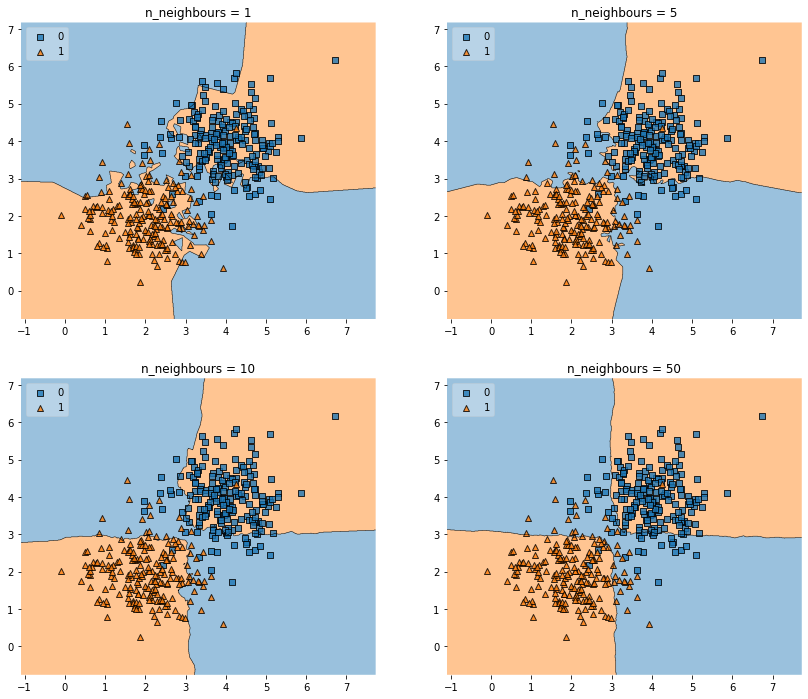

In [11]:
values = [1,5,10,50]
labels = ['n_neighbours = 1','n_neighbours = 5','n_neighbours = 10','n_neighbours = 50']

fig = plt.figure(figsize=(14,12))
count = 0;

for neighbour,label in zip(values,labels):
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn_scores = cross_val_score(knn, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    count = count + 1;
    knn.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data1_X, y=Data1_Y, clf=knn, legend=2)

    plt.title(label)
plt.show()

<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

<span style="color:green">**Answer:** </span>   on increasing the n_neighbours value the decision boundary becomes smoother which means a decrease in variance and increase in BIas 

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [70]:
A = [Data1_X,Data2_X,Data3_X,Data4_X]
B = [Data1_Y,Data2_Y,Data3_Y,Data4_Y]
count = 1
for Data_X,Data_Y in zip(A,B):
    nb = GaussianNB()
    b_scores = cross_val_score(nb, Data_X, Data_Y, cv=10, scoring='accuracy')
    print("\n----------------"+"Data "+str(count)+"----------------------------")
    count = count+1
    print(b_scores)
    



----------------Data 1----------------------------
[0.975 1.    1.    0.925 0.95  0.975 0.975 0.9   0.975 1.   ]

----------------Data 2----------------------------
[0.075  0.0625 0.0125 0.0875 0.0875 0.025  0.05   0.05   0.0125 0.0375]

----------------Data 3----------------------------
[1.    0.95  0.975 0.975 0.975 0.975 0.925 0.9   0.975 0.95 ]

----------------Data 4----------------------------
[0.90196078 1.         0.98       0.98       0.98       0.96
 0.94       0.96       0.97959184 0.95918367]


In [71]:
A = [Data1_X,Data2_X,Data3_X,Data4_X]
B = [Data1_Y,Data2_Y,Data3_Y,Data4_Y]
count = 1
for Data_X,Data_Y in zip(A,B):
    nb = GaussianNB()
    b_scores = cross_val_score(nb, Data_X, Data_Y, cv=10, scoring='accuracy')
    print("\n----------------"+"Data "+str(count)+"----------------------------")
    count = count+1
    print(b_scores.mean())
    


----------------Data 1----------------------------
0.9675

----------------Data 2----------------------------
0.049999999999999996

----------------Data 3----------------------------
0.96

----------------Data 4----------------------------
0.9640736294517807


<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

<span style="color:green">**Answer:** </span>  the Data 2 performsvery poorly since the NB algorithm assumes it to be independent. In the Given Data set the features might not be independent given the class label which leads to performance issues. Rest of the data performs with better accuracy and fast compared to other algorithms

<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

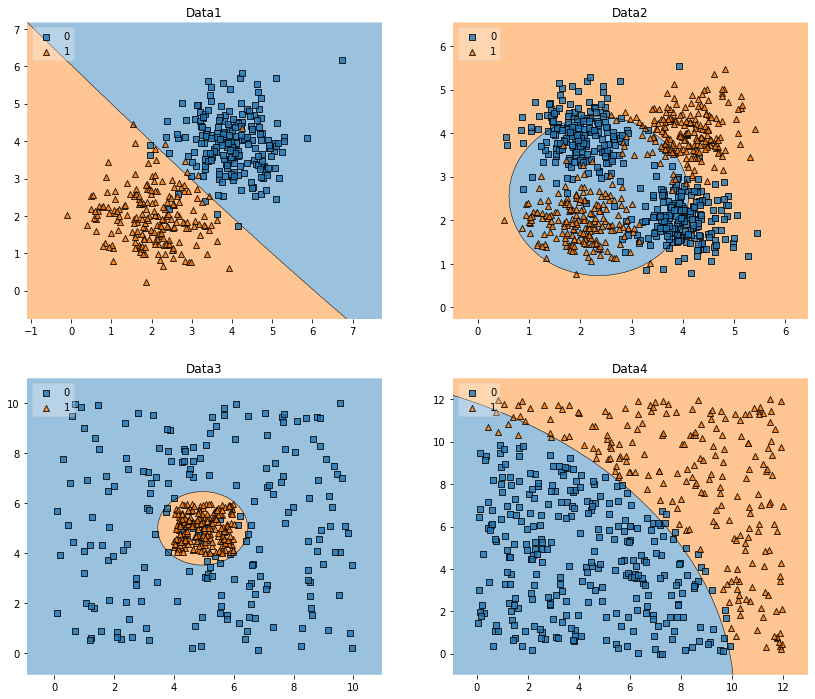

In [29]:
A = [Data1_X,Data2_X,Data3_X,Data4_X]
B = [Data1_Y,Data2_Y,Data3_Y,Data4_Y]
labels = ["Data1","Data2","Data3","Data4"]
fig = plt.figure(figsize=(14,12))
count = 0;
for Data_X,Data_Y,label in zip(A,B,labels):
    nb = GaussianNB()
    b_scores = cross_val_score(nb, Data_X, Data_Y, cv=10, scoring='roc_auc')
    count = count + 1;
    nb.fit(Data_X, Data_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data_X, y=Data_Y, clf=nb, legend=2)
    plt.title(label)
plt.show()

<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

<span style="color:green">**Answer:** </span>  the shape of the decision boundary seems to be quadratic and it is a linear on data1. since the NB classifier boundary is quadratic in nature.

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

<span style="color:green">**Answer:** </span>  naive bayes assumes independence on data sets . the lack of independence on feature sets in data2 resulted in low performance

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

<span style="color:green">**Answer:** </span> 
Data 1> Data4>Data3>Data2 <Br>
    data 1 - SVM perform well on this dataas the hyper plane can be drawn well for the data set <br>
Data2 : it is difficult to drawn a hyper plane for this type of dataset. it will result in a low accuracy the linea rhyper plane cannot divide the data <br>
Data3: it is difficult to drawn a hyper plane for this type of dataset. it will result in a low accuracy<br>
Data4: this dataset is good to draw a hyperplane as the plane can divide the data into two classes


<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [72]:
A = [Data1_X,Data2_X,Data3_X,Data4_X]
B = [Data1_Y,Data2_Y,Data3_Y,Data4_Y]
count = 1
for Data_X,Data_Y in zip(A,B):
    svm_linear = SVC(C=0.5, kernel='linear')
    svm_linear_scores = cross_val_score(svm_linear, Data_X, Data_Y, cv=10, scoring='accuracy')
    print("\n----------------"+"Data "+str(count)+"----------------------------")
    count = count+1
    print(svm_linear_scores)




----------------Data 1----------------------------
[0.975 1.    1.    0.95  0.95  0.95  0.975 0.9   0.975 1.   ]

----------------Data 2----------------------------
[0.125  0.1375 0.0125 0.0875 0.2    0.2375 0.1    0.15   0.1875 0.175 ]

----------------Data 3----------------------------
[0.625 0.625 0.65  0.6   0.65  0.7   0.65  0.675 0.625 0.625]

----------------Data 4----------------------------
[0.94117647 0.90196078 0.92       0.92       0.98       0.92
 0.94       0.92       0.95918367 0.85714286]


In [73]:
A = [Data1_X,Data2_X,Data3_X,Data4_X]
B = [Data1_Y,Data2_Y,Data3_Y,Data4_Y]
count = 1
for Data_X,Data_Y in zip(A,B):
    svm_linear = SVC(C=0.5, kernel='linear')
    svm_linear_scores = cross_val_score(svm_linear, Data_X, Data_Y, cv=10, scoring='accuracy')
    print("\n----------------"+"Data "+str(count)+"----------------------------")
    count = count+1
    print(svm_linear_scores.mean())


----------------Data 1----------------------------
0.9674999999999999

----------------Data 2----------------------------
0.14125000000000001

----------------Data 3----------------------------
0.6425000000000001

----------------Data 4----------------------------
0.9259463785514207


<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

<span style="color:green">**Answer:** </span>Data1>Data4>Data3>Data2


<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets

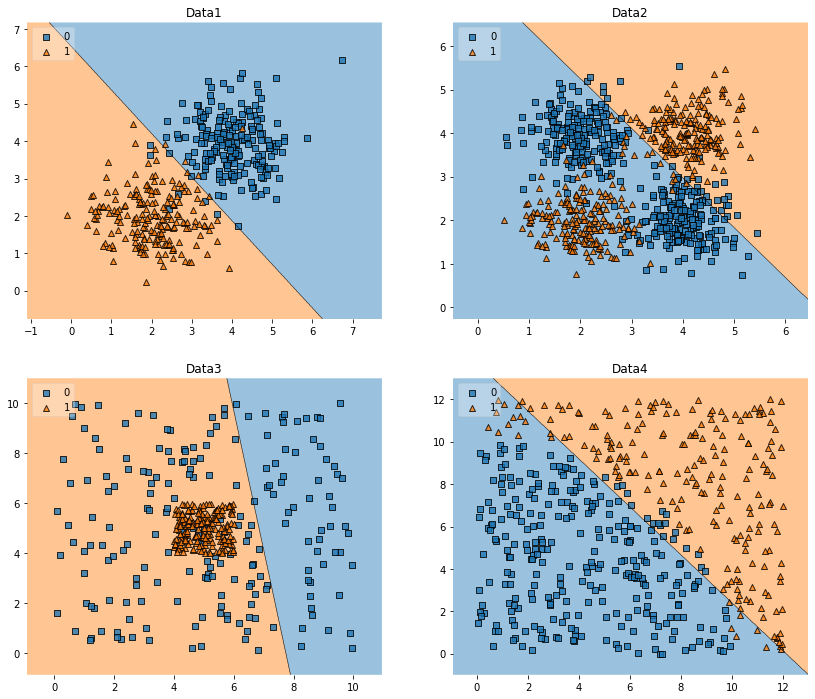

In [37]:
A = [Data1_X,Data2_X,Data3_X,Data4_X]
B = [Data1_Y,Data2_Y,Data3_Y,Data4_Y]
labels = ["Data1","Data2","Data3","Data4"]
fig = plt.figure(figsize=(14,12))
count = 0;
for Data_X,Data_Y,label in zip(A,B,labels):
    svm_linear = SVC(C=0.5, kernel='linear')
    svm_linear_scores = cross_val_score(svm_linear, Data_X, Data_Y, cv=10, scoring='roc_auc')
    count = count + 1;
    svm_linear.fit(Data_X, Data_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data_X, y=Data_Y, clf=svm_linear, legend=2)
    plt.title(label)
plt.show()

<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

<span style="color:green">**Answer:** </span> since the HyperPlane is a linear. it cannot divide data3 and data2 with good regions and leads to low accuracy <br> the Data1 and Data4 are good enough to divide them into class labels by the linear hyper plane


### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [74]:
values = [1,2,3]
labels = ['SVM_Poly_Deg_1','SVM_Poly_Deg_2','SVM_Poly_Deg_3']
for polynomial,label in zip(values,labels):
    svm_poly = SVC(C=0.5, kernel='poly', degree = polynomial, gamma = 'auto')
    svm_poly_scores = cross_val_score(svm_poly, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print(label)
    print(svm_poly_scores) 
    print('-----------------------')
    


SVM_Poly_Deg_1
[0.1375 0.125  0.0125 0.0875 0.175  0.1875 0.1    0.1625 0.1875 0.1625]
-----------------------
SVM_Poly_Deg_2
[0.8125 0.8375 0.8875 0.8375 0.8875 0.8875 0.8625 0.8875 0.9125 0.8375]
-----------------------
SVM_Poly_Deg_3
[0.825  0.875  0.8875 0.8625 0.925  0.9    0.8625 0.8875 0.8875 0.85  ]
-----------------------


In [75]:
values = [1,2,3]
labels = ['SVM_Poly_Deg_1','SVM_Poly_Deg_2','SVM_Poly_Deg_3']
for polynomial,label in zip(values,labels):
    svm_poly = SVC(C=0.5, kernel='poly', degree = polynomial, gamma = 'auto')
    svm_poly_scores = cross_val_score(svm_poly, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print(label)
    print(svm_poly_scores.mean()) 
    print('-----------------------')

SVM_Poly_Deg_1
0.13375
-----------------------
SVM_Poly_Deg_2
0.865
-----------------------
SVM_Poly_Deg_3
0.8762500000000001
-----------------------


<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

<span style="color:green">**Answer:** </span> Polynomial Degree 3> Polynomial Degree 2> Polynomial Degree 1


<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

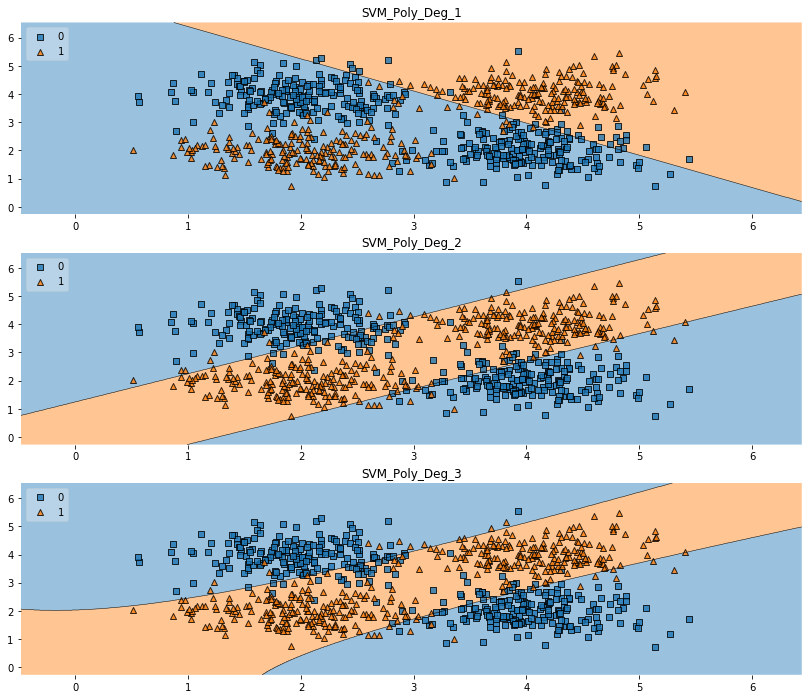

In [63]:
svm_poly_1 = SVC(C=0.5, kernel='poly', degree = 1, gamma = 'auto')
svm_poly_2 = SVC(C=0.5, kernel='poly', degree = 2, gamma = 'auto')
svm_poly_3 = SVC(C=0.5, kernel='poly', degree = 3, gamma = 'auto')

clf_list = [svm_poly_1,svm_poly_2,svm_poly_3]
labels = ['SVM_Poly_Deg_1','SVM_Poly_Deg_2','SVM_Poly_Deg_3']
fig = plt.figure(figsize=(14,12))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(3,1,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

<span style="color:green">**Answer:** </span> when the polynomial Degree 1 : the hyper plane is linear and not able to divide the data into its respective class label and ended up with low accuracy<br>
when the polynomial degree is 2 the data points are significantly divided to their respective class labels and the accuracy increased due to the polynomial function dividing the region by its hyperbolic shape which is a quadratic.
<br>
when the polynomial degree is 3 the data points are further divided to their respective class labels and the accuracy increased due to the polynomial function 

<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [76]:
values = [0.01,0.1,1]
labels = ['gamma = 0.01','gamma = 0.1','gamma = 1']
for gama,label in zip(values,labels):
    svm_rbf = SVC(C = 0.5, kernel='rbf', gamma= gama) 
    svm_rbf_scores = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print(label)
    print(svm_rbf_scores) 
    print('-----------------------')



gamma = 0.01
[0.375  0.3125 0.0875 0.25   0.4375 0.3375 0.3    0.3    0.275  0.3375]
-----------------------
gamma = 0.1
[0.975  0.9    0.9375 0.9    0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]
-----------------------
gamma = 1
[0.9875 0.9125 0.95   0.925  0.9625 0.9375 0.875  0.9375 0.9625 0.95  ]
-----------------------


In [77]:
values = [0.01,0.1,1]
labels = ['gamma = 0.01','gamma = 0.1','gamma = 1']
for gama,label in zip(values,labels):
    svm_rbf = SVC(C = 0.5, kernel='rbf', gamma= gama) 
    svm_rbf_scores = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print(label)
    print(svm_rbf_scores.mean()) 
    print('-----------------------')

gamma = 0.01
0.30124999999999996
-----------------------
gamma = 0.1
0.93625
-----------------------
gamma = 1
0.9399999999999998
-----------------------


<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

<span style="color:green">**Answer:** </span> gamma = 1 > gamma = 0.1>gamma = 0.01


<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

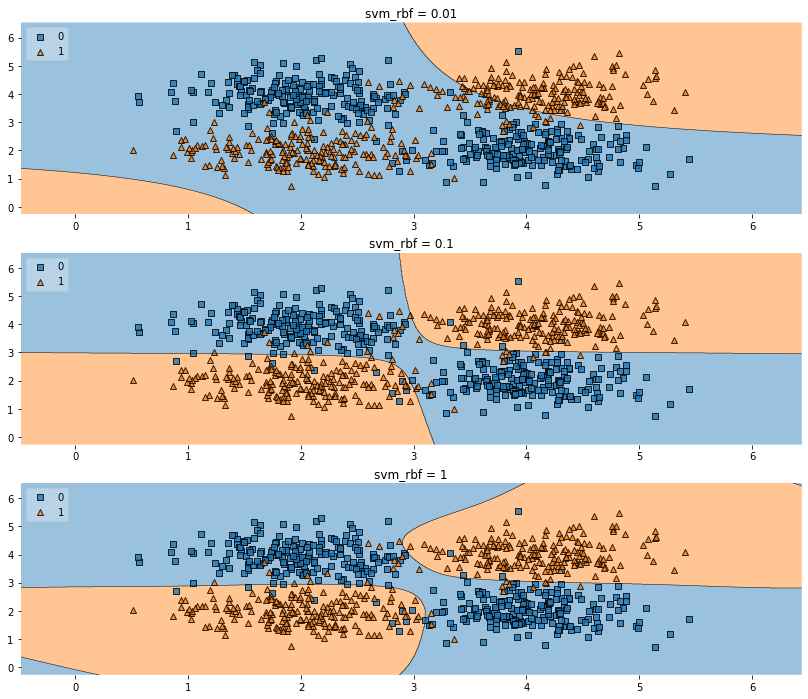

In [62]:
svm_rbf1 = SVC(C = 0.5, kernel='rbf', gamma= 0.01)
svm_rbf2 = SVC(C = 0.5, kernel='rbf', gamma= 0.1) 
svm_rbf3 = SVC(C = 0.5, kernel='rbf', gamma= 1) 

clf_list = [svm_rbf1,svm_rbf2,svm_rbf3]
labels = ['svm_rbf = 0.01','svm_rbf = 0.1','svm_rbf = 1']
fig = plt.figure(figsize=(14,12))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(3,1,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

<span style="color:green">**Answer:** </span> since the RBF kernel are based on the rules and can overlap the rules. morover the RBF uses normal curves which are flexible to divide the regions for the data points.




<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data3? Explain your reason.

<span style="color:green">**Answer:** </span>Between SVM with a polynomial kernel and SVM with an RBF kernel, the RBF kernel is better suited as RBF uses normal curves which are more flexible based on the rules and polynommial would be defined but arbitary in the space of data.




### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [7]:
values = [3,4,5,6]
labels = ['cv = 3','cv = 4','cv = 5','cv = 6']
for cv,label in zip(values,labels):
    svm_rbf = SVC(C = 0.5, kernel='rbf', gamma= 0.1) 
    svm_rbf_scores = cross_val_score(svm_rbf, Data2_X, Data2_Y, cv=cv, scoring='accuracy')
    print(label)
    print(svm_rbf_scores.mean()) 
    print('-----------------------')

cv = 3
0.903826731006621
-----------------------
cv = 4
0.91625
-----------------------
cv = 5
0.9275
-----------------------
cv = 6
0.9325531433740389
-----------------------


<span style="color:green">**Answer:** </span> As the number of folds increases for the SVM classifier with RBF kernel the number of rules increases. since the ties are resolved based on the size of rules.

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [81]:
dt = DecisionTreeClassifier(max_depth = 4 )

knn = KNeighborsClassifier(n_neighbors=5)

nb = GaussianNB()

svm_linear = SVC(C=0.5, kernel='linear')

svm_poly = SVC(C=0.5, kernel='poly', degree = 3, gamma = 'auto')

svm_rbf = SVC(C = 0.5, kernel='rbf', gamma= 0.1) 

classifiers = [dt,knn,nb,svm_linear,svm_poly,svm_rbf]
labels = ['Decision tree','K N N','Naive Bayes','SVM_Linear','SVM_Poly','SVM_RBF']
for classifier, label in zip(classifiers,labels):
    print('---------------------------'+label+'--------------------------------')
    classifier_scores = cross_val_score(classifier, Data3_X, Data3_Y, cv=30, scoring='accuracy')
    print('Accuracy = '+str(classifier_scores.mean()))
    classifier_scores = cross_val_score(classifier, Data3_X, Data3_Y, cv=30, scoring='precision')
    print('Precision = '+str(classifier_scores.mean()))

---------------------------Decision tree--------------------------------
Accuracy = 0.9718253968253968
Precision = 0.9604497354497356
---------------------------K N N--------------------------------
Accuracy = 0.9492063492063493
Precision = 0.9188311688311689
---------------------------Naive Bayes--------------------------------
Accuracy = 0.9591269841269843
Precision = 0.9328571428571429
---------------------------SVM_Linear--------------------------------
Accuracy = 0.6428571428571429
Precision = 0.5881701631701632
---------------------------SVM_Poly--------------------------------
Accuracy = 0.8555555555555555
Precision = 0.7950348725348725
---------------------------SVM_RBF--------------------------------
Accuracy = 0.9392857142857143
Precision = 0.9036856661856661


<span style="color:green">**Answer:** </span> <br>
Accuracy : Decision Tree > Naive Bayes > K N N > SVM_RBF > SVM_Poly > SVM_Linear <br>
Precision : Decision Tree > Naive Bayes > K N N > SVM_RBF > SVM_Poly > SVM_Linear<br>
the precision and accuracy are ranked as same with the best classifiers



### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [9]:
svm_linear = SVC(C=0.5, kernel='linear')
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Bagging Accuracy: %.2f standard deviation :(+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Bagging Accuracy: 0.59 standard deviation :(+/- 0.07) #estimators: 1
Bagging Accuracy: 0.63 standard deviation :(+/- 0.11) #estimators: 2
Bagging Accuracy: 0.64 standard deviation :(+/- 0.08) #estimators: 3
Bagging Accuracy: 0.67 standard deviation :(+/- 0.10) #estimators: 4
Bagging Accuracy: 0.64 standard deviation :(+/- 0.09) #estimators: 5
Bagging Accuracy: 0.67 standard deviation :(+/- 0.08) #estimators: 10
Bagging Accuracy: 0.69 standard deviation :(+/- 0.03) #estimators: 20


<span style="color:green">**Answer:** </span> In Bagging all the data points are not covered as the data points are chosen randomly which has led to poor accuracy on such type of data.



<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

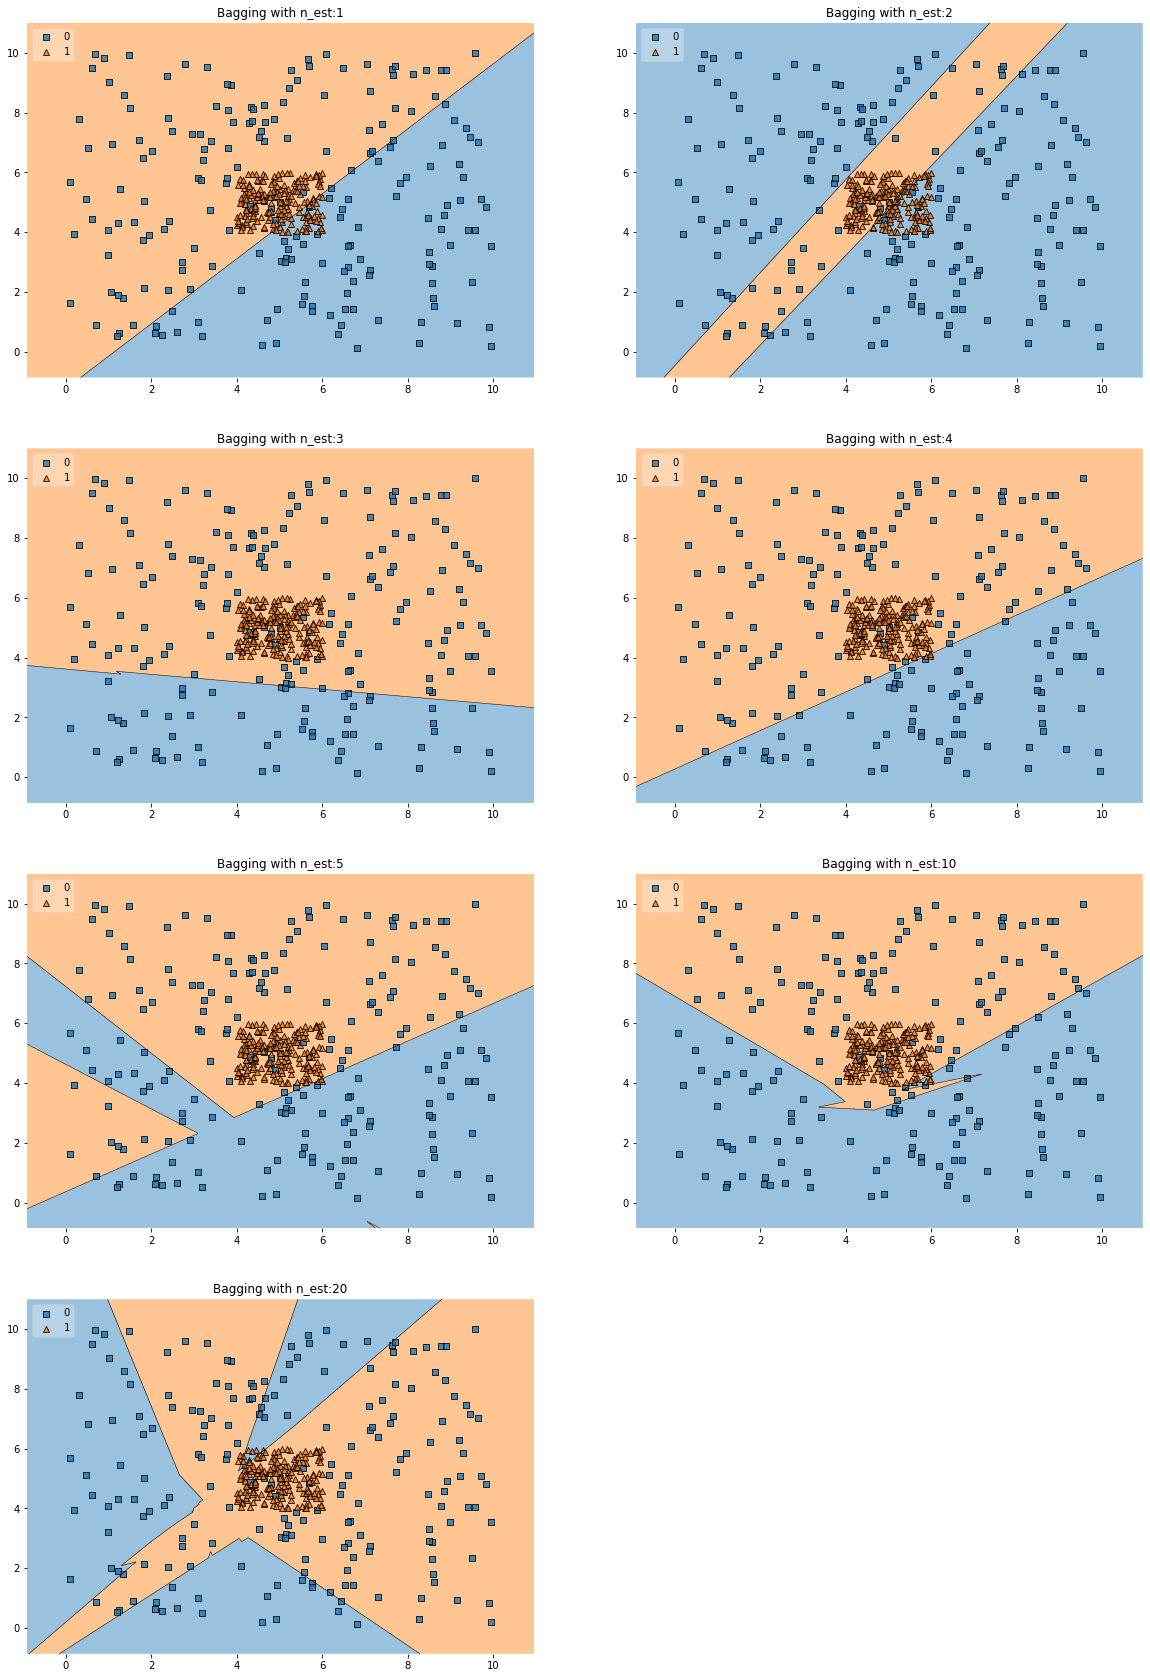

In [90]:
fig = plt.figure(figsize=(20, 30))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data2_X, Data2_Y)
    ax = plt.subplot(4,2,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2)
    plt.title('Bagging with n_est:'+str(n_est))
    
plt.show()

<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

<span style="color:green">**Answer:** </span>  the decision regions depends on the datapoints chosen for the subset. and every subset is independent in the bagging model where they are to be chosen randomly. but however the bagging performance was improved when compared to the individual single SVM Linear classifier.


<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [91]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f standard deviation :(+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Boosting Accuracy: 0.88 standard deviation :(+/- 0.03) #estimators: 1
Boosting Accuracy: 0.88 standard deviation :(+/- 0.03) #estimators: 2
Boosting Accuracy: 0.90 standard deviation :(+/- 0.04) #estimators: 3
Boosting Accuracy: 0.90 standard deviation :(+/- 0.04) #estimators: 4
Boosting Accuracy: 0.92 standard deviation :(+/- 0.03) #estimators: 5
Boosting Accuracy: 0.92 standard deviation :(+/- 0.04) #estimators: 10
Boosting Accuracy: 0.91 standard deviation :(+/- 0.04) #estimators: 20
Boosting Accuracy: 0.91 standard deviation :(+/- 0.02) #estimators: 40


<span style="color:green">**Answer:** </span> the mean of the accuracy is significantly improved since the boosting cration of subsets is not by random but by the previous performances. the weak learners which are misclassfied in the previous dataset have given the most weightage in the present subset which improves the accuracy. and there is also increase in the standard deviation as well.



<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

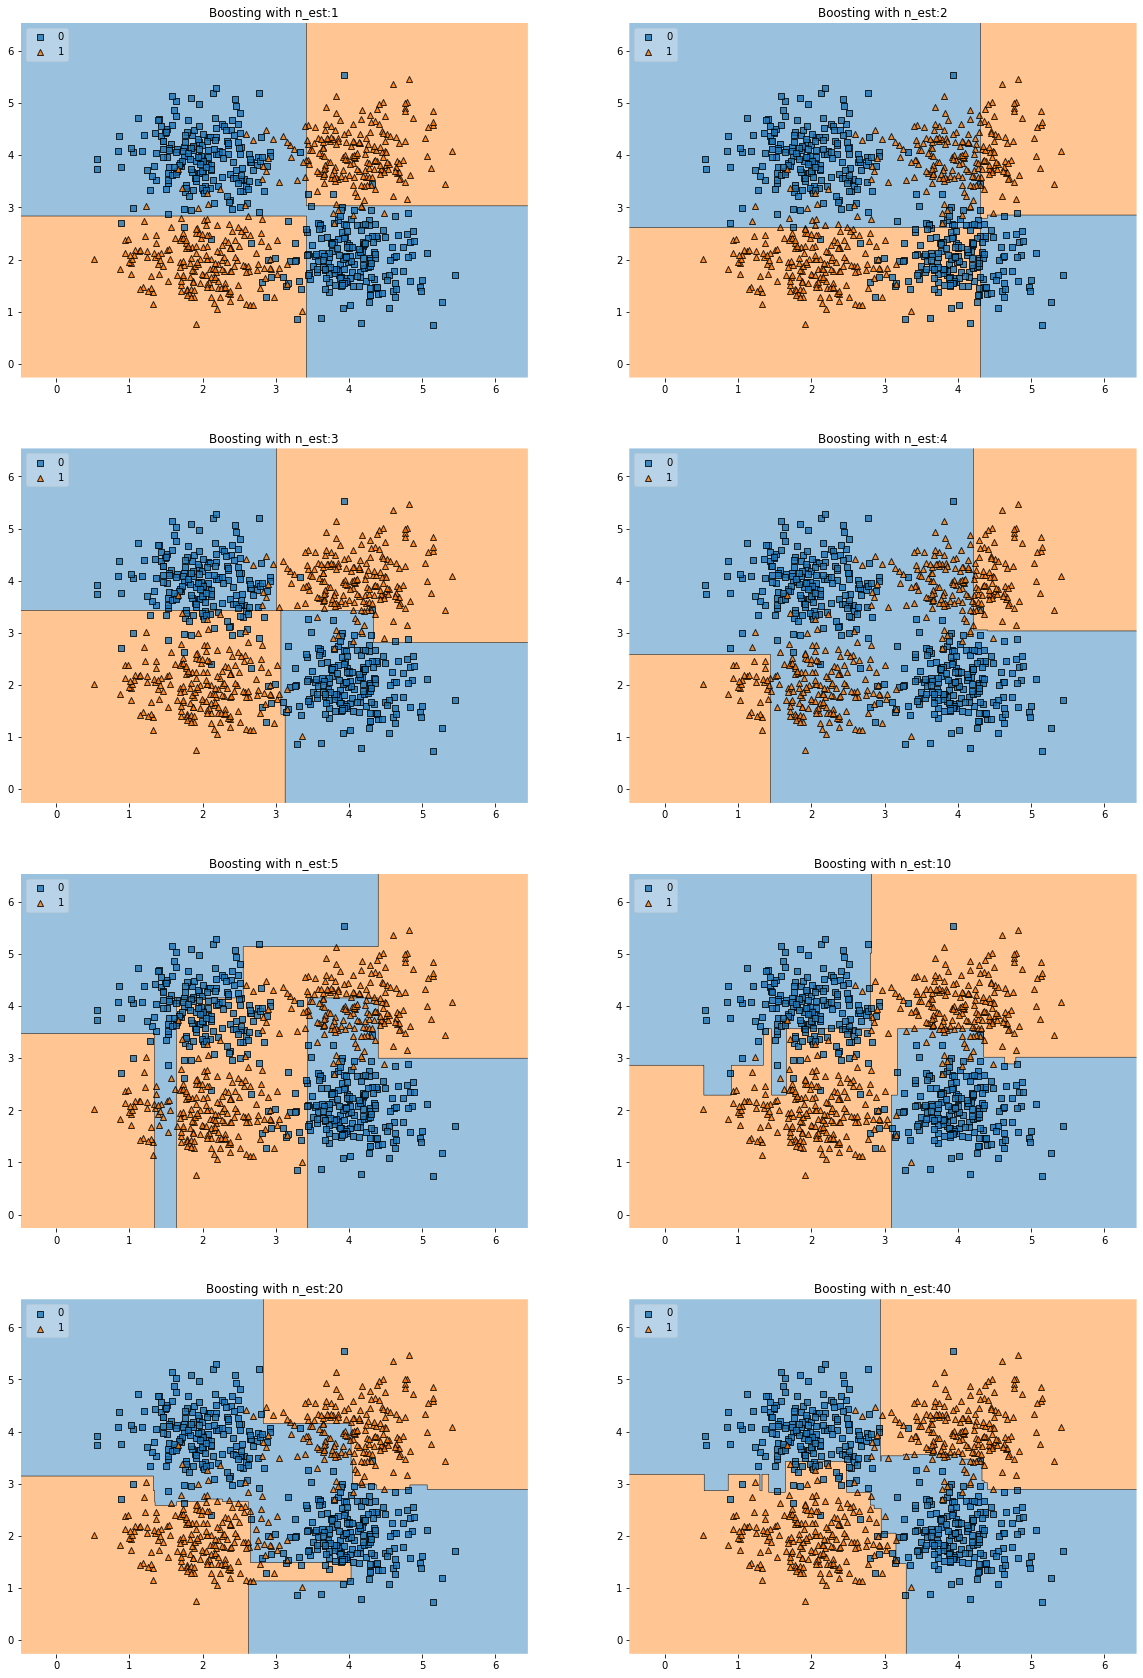

In [92]:
fig = plt.figure(figsize=(20, 30))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=dt, n_estimators=n_est)
    bagging.fit(Data2_X, Data2_Y)
    ax = plt.subplot(4,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=bagging, legend=2)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

<span style="color:green">**Answer:** </span>  the misclassified weak learners in the previous model are given the weightage in the present model which enables to cover all the data points improving the accuracy which can be seen in the above plots.

### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [11]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [13]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [14]:
X = cancer.data
Y = cancer.target

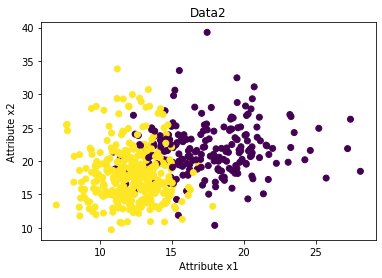

In [15]:
plt.scatter(X[:,0],X[:,1], c= Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data2')
plt.show()

Number of samples are:

In [16]:
X.shape

(569, 30)

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [106]:
#Linear SVM
A = [0.001, 0.01, 0.1, 1]
count = 1
for C in A:
    svm_linear = SVC(C=C, kernel='linear')
    svm_linear_scores = cross_val_score(svm_linear, X, Y, cv=10, scoring='accuracy')
    print("\n----------------"+"C ="+str(C)+"----------------------------")
    print(svm_linear_scores.mean())



----------------C =0.001----------------------------
0.9402460893613342

----------------C =0.01----------------------------
0.947235545760954

----------------C =0.1----------------------------
0.9472366260478783

----------------C =1----------------------------
0.9543179068360554


In [114]:
#Polynomial varying C and degree
values = [1,2]
A = [0.001, 0.01, 0.1, 1]
labels = ['SVM_Poly_Deg_1','SVM_Poly_Deg_2','SVM_Poly_Deg_3']
for polynomial,label in zip(values,labels):
    print(label)
    for C in A:
        svm_poly = SVC(C=C, kernel='poly', degree = polynomial, gamma = 'auto')
        svm_poly_scores = cross_val_score(svm_poly, X, Y, cv=10, scoring='accuracy')
        print("\n----------------"+"C ="+str(C)+"----------------------------")
        print(svm_poly_scores.mean()) 
    print('--------------------------------------------------------------------')

SVM_Poly_Deg_1

----------------C =0.001----------------------------
0.9280269639616281

----------------C =0.01----------------------------
0.9402784979690605

----------------C =0.1----------------------------
0.947266874081756

----------------C =1----------------------------
0.947266874081756
--------------------------------------------------------------------
SVM_Poly_Deg_2

----------------C =0.001----------------------------
0.9490849969751964

----------------C =0.01----------------------------
0.957919583441362

----------------C =0.1----------------------------
0.957919583441362

----------------C =1----------------------------
0.9579509117621638
--------------------------------------------------------------------


In [17]:
#RBF varying C and gamma
values = [1,2]
gama = [0.001, 0.01, 0.1, 1, 10, 100]
labels = ['C = 1','C =2']
for C,label in zip(values,labels):
    print(label)
    for g in gama:
        svm_rbf = SVC(C = C, kernel='rbf', gamma= g) 
        svm_rbf_scores = cross_val_score(svm_rbf, X, Y, cv=10, scoring='roc_auc')
        print("\n----------------"+"gamma ="+str(g)+"----------------------------")
        print(svm_rbf_scores.mean()) 
    print('-------------------------------------------------------------')

C = 1

----------------gamma =0.001----------------------------
0.9595593692022263

----------------gamma =0.01----------------------------
0.9373986463272178

----------------gamma =0.1----------------------------
0.9163149350649352

----------------gamma =1----------------------------
0.519563492063492

----------------gamma =10----------------------------
0.5

----------------gamma =100----------------------------
0.5
-------------------------------------------------------------
C =2

----------------gamma =0.001----------------------------
0.9547617329760187

----------------gamma =0.01----------------------------
0.9376609633752491

----------------gamma =0.1----------------------------
0.9163149350649352

----------------gamma =1----------------------------
0.519563492063492

----------------gamma =10----------------------------
0.5

----------------gamma =100----------------------------
0.5
-------------------------------------------------------------


<span style="color:green">**Answer:** </span> 
out of all the classifiers in SVM with different parameters, SVM with kernel RBF with C = 1 and gamma = 0.001 has given the most accuracy<BR>
LINEAR SVM = the Linear SVM has most accuracy when C = 1<br>
POLY SVM  = the Poly svm has the most accuracy at C=1 with polynomial degree = 2<br>
RBF SVM = the RBF SVM has the most accuracy at C = 1 and gamma = 0.001 
    

<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

In [115]:
values = [2,4,6,8,10,50]
labels = ['Max_Depth = 2','Max_Depth = 4','Max_Depth = 6','Max_Depth = 8','Max_Depth = 10','Max_Depth = 50']
for maxi,label in zip(values,labels):
    dt = DecisionTreeClassifier(max_depth = maxi )
    dt_scores = cross_val_score(dt, X, Y, cv=10, scoring='accuracy')
    print(label)
    print('Accuracy=' +  str(dt_scores.mean()) )

Max_Depth = 2
Accuracy=0.9211639011321406
Max_Depth = 4
Accuracy=0.9139918762423299
Max_Depth = 6
Accuracy=0.9176248811684384
Max_Depth = 8
Accuracy=0.914023204563132
Max_Depth = 10
Accuracy=0.9140534525970099
Max_Depth = 50
Accuracy=0.9087892144153488


<span style="color:green">**Answer:** </span> the decision tree classifier give the most accuracy at Max Depth = 2

<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

<span style="color:green">**Answer:** </span> since the Data sets are larger and from the above comparisions i prefer to use SVM with RBF Kernel for the SVM Classifier because it provides a good classification accuracy. In such scenarios the classification Accuracy would be the primary measure which the RBF kernel outperforms other classifiers and other parameters like ROC would be taken into consideration in such scenarios.
